# Исследование покемонов и их свойств

In [439]:
import pandas as pd
from pandas import read_csv, DataFrame
pokemons = pd.read_csv("pokemon.csv")
pokemons.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


Сразу заметим, что колонка "identifier" очень близка к "name" и удалим её и "японские" колонки, т. к. по смыслу они близки к русским, а работать с ними сложнее.

In [440]:
pokemons = pokemons.drop(["identifier", "name_jp","name_jp_romaji", "species_jp"], axis  = 1)
pokemons.head()

,id,name,name_phonetic,species,generation_id,ndex,kdex,jdex,jdex_old,hdex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,Bulbasaur,Bulbasaur,Seed,1,1,1.0,231.0,226.0,NaN,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,Ivysaur,Ivysaur,Seed,1,2,2.0,232.0,227.0,NaN,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,Venusaur,Veenasore,Seed,1,3,3.0,233.0,228.0,NaN,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,Charmander,Char-mander,Lizard,1,4,4.0,234.0,229.0,NaN,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,Charmeleon,Char-meeleon,Flame,1,5,5.0,235.0,230.0,NaN,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [441]:
pokemons.id.count()

663

Заметим, что почти все имена читаются так же, как и пишутся. Фух. Теперь точно не ошибёмся.
Для этого выведем 11 тех, которые произносятся по-другому:

In [442]:
pokemons.id[pokemons.name != pokemons.name_phonetic].count()

11

In [443]:
pokemons.loc[:, "name" : "name_phonetic"][pokemons.name != pokemons.name_phonetic]

,name,name_phonetic
2,Venusaur,Veenasore
3,Charmander,Char-mander
4,Charmeleon,Char-meeleon
5,Charizard,Char-izahd
7,Wartortle,Wore-torrtle
8,Blastoise,Blas-toys
13,Kakuna,Kakoona
16,Pidgeotto,Pidgey-ohtoe
17,Pidgeot,Pidgey-ot
24,Pikachu,Peekachoo


In [444]:
index = [pokemons.iloc[:, i].count() for i in range (5, 12)]
index

[663, 151, 256, 251, 205, 218, 158]

Посчитав количество различных индексов, заметим что они есть далеко не у всех (кроме ndex). 
Так как мы также не знаем их назначения, то использовать не будем. Удаляем:  

In [445]:
cols_to_drop = [i for i in range (6, 12)]
pokemons = pokemons.drop(pokemons.columns[cols_to_drop], axis  = 1)
pokemons.head()

,id,name,name_phonetic,species,generation_id,ndex,type1_id,type2_id,ability1_id,ability2_id,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,Bulbasaur,Bulbasaur,Seed,1,1,12,4.0,65,NaN,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,Ivysaur,Ivysaur,Seed,1,2,12,4.0,65,NaN,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,Venusaur,Veenasore,Seed,1,3,12,4.0,65,NaN,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,Charmander,Char-mander,Lizard,1,4,10,NaN,66,NaN,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,Charmeleon,Char-meeleon,Flame,1,5,10,NaN,66,NaN,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


Последние ячейки по нескольким параметрам логически отличаются от остальных. Так как причины этого отличия мы не знаем, то просто не будем их учитывать.

In [446]:
pokemons.id[pokemons.id > 1000]
pokemons.id[pokemons.id != pokemons.ndex]

649    10001
650    10002
651    10003
652    10004
653    10005
654    10006
655    10007
656    10008
657    10009
658    10010
659    10011
660    10012
661    10017
662    10018
Name: id, dtype: int64

In [447]:
pokemons = pokemons.drop(pokemons.index[649 : 663])
pokemons.tail()

,id,name,name_phonetic,species,generation_id,ndex,type1_id,type2_id,ability1_id,ability2_id,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
644,645,Landorus,Landorus,Abundance,5,645,5,3.0,159,NaN,...,270,90,15,NaN,0,NaN,120,1250000,662,NaN
645,646,Kyurem,Kyurem,Boundary,5,646,16,15.0,46,NaN,...,297,0,15,NaN,0,NaN,120,1250000,663,NaN
646,647,Keldeo,Keldeo,Colt,5,647,11,2.0,154,NaN,...,261,35,15,NaN,0,NaN,80,1250000,664,NaN
647,648,Meloetta,Meloetta,Melody,5,648,1,14.0,32,NaN,...,270,100,15,NaN,0,NaN,120,1250000,665,NaN
648,649,Genesect,Genesect,Paleozoic,5,649,7,9.0,88,NaN,...,270,0,15,NaN,0,NaN,120,1250000,667,NaN


Исследуем связь между весом покемона и его счастьем:

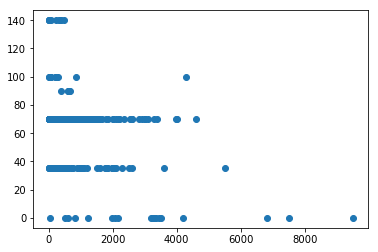

In [448]:
import matplotlib.pyplot as plt
graph1 = plt.figure()
plt.scatter(pokemons.weight, pokemons.base_happiness)
plt.show()

Получается - что наиболее счастливые покемоны - самые лёгкие. Счастье придаёт лёгкость!

In [449]:
pokemons.count()

id                             649
name                           649
name_phonetic                  649
species                        649
generation_id                  649
ndex                           649
type1_id                       649
type2_id                       295
ability1_id                    649
ability2_id                    355
abilitydream_id                568
evolution_parent_pokemon_id    321
evolution_method_id            320
evolution_parameter            300
height                         649
weight                         649
gender_rate                    649
catch_rate                     649
exp_yield                      649
base_happiness                 649
egg_group1_id                  649
egg_group2_id                  175
is_baby                        649
baby_breed_item_id               9
hatch_counter                  649
lvl_100_exp                    649
pokemon_order                  649
legacy_id                      493
dtype: int64

In [450]:
abilities = pd.read_csv("abilities.csv")
abilities.head()

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
0,1,stench,Stench,あくしゅう,Stench,3,4
1,2,drizzle,Drizzle,あめふらし,Rainfall,3,11
2,3,speed-boost,Speed Boost,かそく,Acceleration,3,23
3,4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6


In [451]:
eggs = pd.read_csv("egg_groups.csv")
eggs.head()

,id,identifier,name,name_jp,list_order,legacy_id
0,1,monster,Monster,かいじゅう,2,9
1,2,water-1,Water 1,すいちゅう１,8,11
2,3,bug,Bug,むし,3,1
3,4,flying,Flying,ひこう,4,4
4,5,ground,Ground,りくじょう,5,5


In [452]:
grouped1 = pokemons.groupby("ability1_id")
# pokemons.ability2_id[pokemons.ability2_id.isnull()] = false
grouped2 = pokemons.groupby("ability2_id")
#grouped2.first()

In [453]:
abilities.id.count()

164

Посчитаем количество обладателей каждой способности и запишем в таблицу "abilities" новым столбцом:

In [454]:
list = [0 for i in range(abilities.id.count())] 
for i in (pokemons.ability1_id.unique()):
   list[int(i - 1)] += int(grouped1.get_group(i).id.count())
for i in (pokemons.ability2_id.unique()):
    if (i > 0):
        list[int(i - 1)] += int(grouped2.get_group(i).id.count())
abilities.insert(7, "representatives", list)
abilities.head()

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id,representatives
0,1,stench,Stench,あくしゅう,Stench,3,4,6
1,2,drizzle,Drizzle,あめふらし,Rainfall,3,11,1
2,3,speed-boost,Speed Boost,かそく,Acceleration,3,23,3
3,4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6,6
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6,30


In [455]:
abilities.head()

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id,representatives
0,1,stench,Stench,あくしゅう,Stench,3,4,6
1,2,drizzle,Drizzle,あめふらし,Rainfall,3,11,1
2,3,speed-boost,Speed Boost,かそく,Acceleration,3,23,3
3,4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6,6
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6,30
